### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Linear SVC
from sklearn.svm import LinearSVC
# SVM RBF
from sklearn.svm import SVC
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Naïve Bayes
from sklearn.naive_bayes import GaussianNB
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
# XGBoost Classifier
from xgboost import XGBClassifier
# CatBoost Classifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif

### Reading data

In [2]:
shapefile_path = 'business-improvement-areas-bia/business-improvement-areas-bia.shp'
gdf_shapefile = gpd.read_file(shapefile_path)



In [3]:
gdf_shapefile.head()

,mapid,name,geometry
0,1004005,Commercial Dr. BIA,"POLYGON ((-123.07049 49.27667, -123.07081 49.2..."
1,1004006,Hastings - North BIA,"MULTIPOLYGON (((-123.03095 49.28069, -123.0309..."
2,1004011,Kerrisdale BIA,"POLYGON ((-123.15707 49.23507, -123.15622 49.2..."
3,1004012,Marpole BIA,"POLYGON ((-123.13964 49.21416, -123.13980 49.2..."
4,1004015,South Granville BIA,"POLYGON ((-123.13844 49.26669, -123.13844 49.2..."


In [4]:
gdf_shapefile.shape

(24, 3)

In [5]:
gdf_shapefile.name.unique()

array(['Commercial Dr. BIA', 'Hastings - North BIA', 'Kerrisdale BIA',
       'Marpole BIA', 'South Granville BIA', 'Chinatown BIA',
       'Dunbar Village BIA', 'West Broadway BIA', 'Collingwood BIA',
       'Victoria Drive BIA', 'Fraser St. BIA',
       'Kitsilano Fourth Ave. BIA', 'Cambie Village BIA', 'West End BIA',
       'Gastown BIA', 'Robson St. BIA', 'Mount Pleasant BIA',
       'Strathcona Area BIA', 'Yaletown BIA', 'Point Grey Village BIA',
       'Downtown Vancouver BIA', 'Hastings Crossing BIA'], dtype=object)

In [6]:
gdf_shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
gdf_shapefile.isnull().sum()

mapid       0
name        0
geometry    0
dtype: int64

In [8]:
gdf_shapefile.duplicated().sum()

0

C:\Users\Rajat\AppData\Local\Temp\ipykernel_16632\3562414545.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdf_shapefile.mapid)


<Axes: xlabel='mapid', ylabel='Density'>

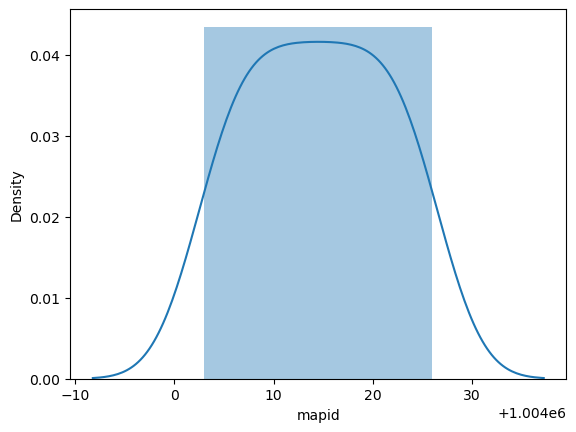

In [9]:
sns.distplot(gdf_shapefile.mapid)

### Loading Disability parking data

In [10]:
gdf2 = gpd.read_file("disability-parking/disability-parking.shp")

In [11]:
gdf2.head()

,description,location,notes,spaces,url,geo_local_a,geometry
0,Designated meter parking space,North Side 1000 Alberni St,No stopping accessible zone,1,NaN,West End,POINT (-123.12193 49.28420)
1,Designated parking zone,West Side 5400 Balsam St,No stopping accessible zone,1,NaN,Arbutus Ridge,POINT (-123.16132 49.23678)
2,Designated meter parking space,South Side 1700 Grant St,No stopping accessible zone,1,NaN,Grandview-Woodland,POINT (-123.06919 49.27125)
3,Designated meter parking space,East Side 700 Hornby St,No stopping accessible zone,1,NaN,Downtown,POINT (-123.12127 49.28292)
4,Designated meter parking space,West Side 3900 Main St,No stopping accessible zone,1,NaN,Riley Park,POINT (-123.10113 49.25012)


In [12]:
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf2.shape

(128, 7)

In [14]:
gdf2.description.unique()

array(['Designated meter parking space', 'Designated parking zone',
       'Designated 2HR parking zone', 'Designated 1HR parking zone',
       'Designated 3HR parking zone - Under Granville St. Bridge',
       'Designated 3HR parking zone',
       'Designated parking zone - 8am-5pm Mon-Fri',
       'Designated 3HR Parking Zone', 'Designated parking zone - 9am-3pm'],
      dtype=object)

In [15]:
np.size(gdf2.location.unique())

119

In [16]:
np.size(gdf2.notes.unique())

7

In [17]:
gdf2.notes.unique()

array(['No stopping accessible zone',
       'No stopping accessible zone 2-hour parking',
       'No stopping accessible zone 1-hour parking',
       'No stopping accessible zone 3-hour parking',
       'No stopping accessible zone - 8am-5pm Mon-Fri',
       'No stopping disabled zone 2-hour parking',
       'No stopping accessible zone 9am-3pm'], dtype=object)

In [18]:
np.size(gdf2.geo_local_a.unique())

19

In [19]:
gdf2.geo_local_a.unique()

array(['West End', 'Arbutus Ridge', 'Grandview-Woodland', 'Downtown',
       'Riley Park', 'Kitsilano', 'Kensington-Cedar Cottage', 'Fairview',
       'Sunset', 'Renfrew-Collingwood', 'Dunbar-Southlands',
       'Hastings-Sunrise', 'Mount Pleasant', 'West Point Grey', 'Marpole',
       'Kerrisdale', 'Strathcona', 'Victoria-Fraserview', 'Oakridge'],
      dtype=object)

In [20]:
gdf2.geometry.unique()

<GeometryArray>
[<POINT (-123.122 49.284)>, <POINT (-123.161 49.237)>,
 <POINT (-123.069 49.271)>, <POINT (-123.121 49.283)>,
  <POINT (-123.101 49.25)>,  <POINT (-123.07 49.268)>,
 <POINT (-123.148 49.268)>, <POINT (-123.141 49.288)>,
 <POINT (-123.133 49.289)>, <POINT (-123.127 49.276)>,
 ...
 <POINT (-123.185 49.248)>, <POINT (-123.094 49.274)>,
 <POINT (-123.125 49.262)>, <POINT (-123.123 49.262)>,
 <POINT (-123.114 49.267)>, <POINT (-123.123 49.262)>,
 <POINT (-123.057 49.233)>, <POINT (-123.142 49.285)>,
 <POINT (-123.137 49.283)>, <POINT (-123.026 49.282)>]
Length: 128, dtype: geometry

In [21]:
gdf2.isnull().sum()

description      0
location         0
notes            0
spaces           0
url            128
geo_local_a      0
geometry         0
dtype: int64

In [22]:
gdf2.duplicated().sum()

0

C:\Users\Rajat\AppData\Local\Temp\ipykernel_16632\2320656962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdf2.spaces)


<Axes: xlabel='spaces', ylabel='Density'>

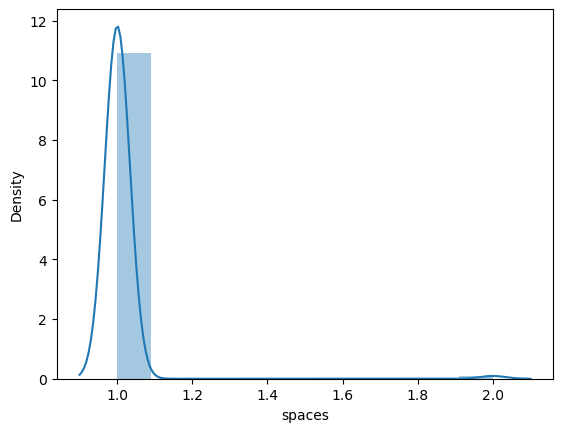

In [23]:
sns.distplot(gdf2.spaces)

## EDA
### Plotting chart from both datasets

C:\Users\Rajat\AppData\Local\Temp\ipykernel_16632\1074108704.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_shapefile.geometry.centroid.x, gdf_shapefile.geometry.centroid.y, gdf_shapefile['name']):
C:\Users\Rajat\AppData\Local\Temp\ipykernel_16632\1074108704.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


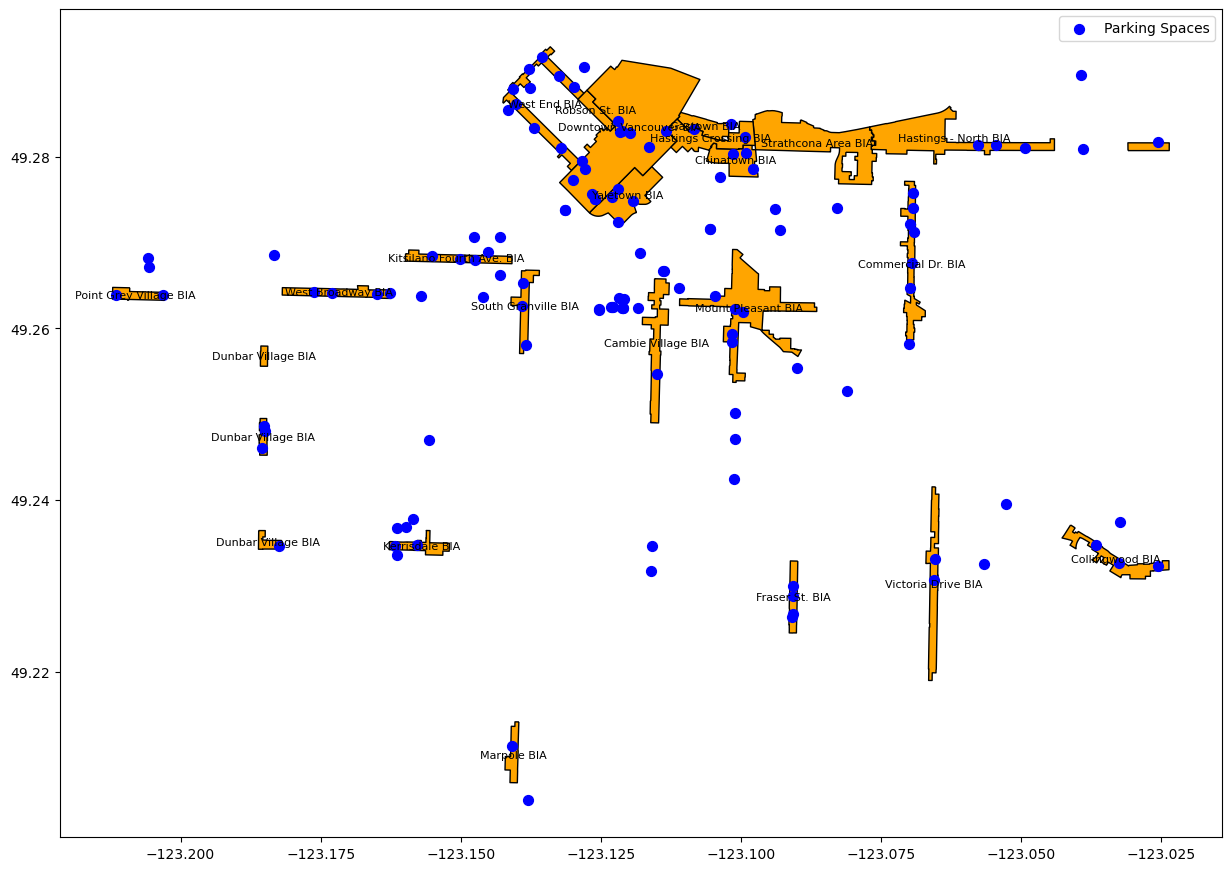

In [24]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15, 15))

# Plot BIA areas
gdf_shapefile.plot(ax=ax, color='orange', edgecolor='black', label='BIAs')

# Plot parking spaces
gdf2.plot(ax=ax, color='blue', marker='o', markersize=50, label='Parking Spaces')


for x, y, label in zip(gdf_shapefile.geometry.centroid.x, gdf_shapefile.geometry.centroid.y, gdf_shapefile['name']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')


ax.legend()


plt.show()


### Performing Spatial Join

In [25]:
joined_data = gpd.sjoin(gdf2, gdf_shapefile, how="inner", op="within")


C:\Users\Rajat\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [26]:
joined_data.columns

Index(['description', 'location', 'notes', 'spaces', 'url', 'geo_local_a',
       'geometry', 'index_right', 'mapid', 'name'],
      dtype='object')

In [27]:
joined_data.shape

(71, 10)

In [28]:
joined_data.isnull().sum()

description     0
location        0
notes           0
spaces          0
url            71
geo_local_a     0
geometry        0
index_right     0
mapid           0
name            0
dtype: int64

In [29]:
df = joined_data.drop(columns=["url"])

In [30]:
df.name.value_counts()

Downtown Vancouver BIA       12
West End BIA                  7
Commercial Dr. BIA            6
Mount Pleasant BIA            5
Fraser St. BIA                4
West Broadway BIA             4
Yaletown BIA                  4
Dunbar Village BIA            4
Collingwood BIA               3
South Granville BIA           3
Hastings - North BIA          3
Chinatown BIA                 3
Kitsilano Fourth Ave. BIA     3
Victoria Drive BIA            2
Point Grey Village BIA        2
Hastings Crossing BIA         2
Kerrisdale BIA                2
Cambie Village BIA            1
Marpole BIA                   1
Name: name, dtype: int64

In [31]:

df.name.value_counts()

Downtown Vancouver BIA       12
West End BIA                  7
Commercial Dr. BIA            6
Mount Pleasant BIA            5
Fraser St. BIA                4
West Broadway BIA             4
Yaletown BIA                  4
Dunbar Village BIA            4
Collingwood BIA               3
South Granville BIA           3
Hastings - North BIA          3
Chinatown BIA                 3
Kitsilano Fourth Ave. BIA     3
Victoria Drive BIA            2
Point Grey Village BIA        2
Hastings Crossing BIA         2
Kerrisdale BIA                2
Cambie Village BIA            1
Marpole BIA                   1
Name: name, dtype: int64

### business improvement areas have at least 3 disability parking spots

In [32]:

df.name.value_counts() >= 3

Downtown Vancouver BIA        True
West End BIA                  True
Commercial Dr. BIA            True
Mount Pleasant BIA            True
Fraser St. BIA                True
West Broadway BIA             True
Yaletown BIA                  True
Dunbar Village BIA            True
Collingwood BIA               True
South Granville BIA           True
Hastings - North BIA          True
Chinatown BIA                 True
Kitsilano Fourth Ave. BIA     True
Victoria Drive BIA           False
Point Grey Village BIA       False
Hastings Crossing BIA        False
Kerrisdale BIA               False
Cambie Village BIA           False
Marpole BIA                  False
Name: name, dtype: bool

In [33]:

selected_names = df['name'].value_counts()[df['name'].value_counts() >= 3].index
filtered_df = df[df['name'].isin(selected_names)]


In [34]:
selected_names

Index(['Downtown Vancouver BIA', 'West End BIA', 'Commercial Dr. BIA',
       'Mount Pleasant BIA', 'Fraser St. BIA', 'West Broadway BIA',
       'Yaletown BIA', 'Dunbar Village BIA', 'Collingwood BIA',
       'South Granville BIA', 'Hastings - North BIA', 'Chinatown BIA',
       'Kitsilano Fourth Ave. BIA'],
      dtype='object')

In [35]:
filtered_df

,description,location,notes,spaces,geo_local_a,geometry,index_right,mapid,name
0,Designated meter parking space,North Side 1000 Alberni St,No stopping accessible zone,1,West End,POINT (-123.12193 49.28420),21,1004020,Downtown Vancouver BIA
3,Designated meter parking space,East Side 700 Hornby St,No stopping accessible zone,1,Downtown,POINT (-123.12127 49.28292),21,1004020,Downtown Vancouver BIA
9,Designated meter parking space,West Side 1200 Seymour St,No stopping accessible zone,1,Downtown,POINT (-123.12667 49.27562),21,1004020,Downtown Vancouver BIA
19,Designated meter parking space,West Side 1300 Hornby St,No stopping accessible zone,1,Downtown,POINT (-123.13002 49.27729),21,1004020,Downtown Vancouver BIA
40,Designated meter parking space,East Side 700 Richard St,No stopping accessible zone,1,Downtown,POINT (-123.11639 49.28106),21,1004020,Downtown Vancouver BIA
...,...,...,...,...,...,...,...,...,...
98,Designated meter parking space,South Side 2600 W Broadway,No stopping accessible zone,1,Kitsilano,POINT (-123.16487 49.26394),7,1004025,West Broadway BIA
108,Designated meter parking space,North Side 3200 W Broadway,No stopping accessible zone,1,Kitsilano,POINT (-123.17621 49.26428),7,1004025,West Broadway BIA
60,Designated 2HR parking zone,South Side 3600 W 29th Av,No stopping accessible zone 2-hour parking,1,Dunbar-Southlands,POINT (-123.18552 49.24611),16,1004023,Dunbar Village BIA
104,Designated 2HR parking zone,East Side 4200 Dunbar St,No stopping accessible zone 2-hour parking,1,Dunbar-Southlands,POINT (-123.18509 49.24861),16,1004023,Dunbar Village BIA


# Area of Focus 2

### parking ticket data 2017-2019

In [36]:
df1 = pd.read_csv("parking-tickets-2017-2019.csv", sep=';')


In [37]:
df1

,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year
0,800,Great Northern Way,2017-05-08,2849,17.6(A),IS,PARK AT A PLACE ON A STREET WHERE A TRAFFIC SI...,2017
1,3600,Main St.,2017-05-08,2849,17.3,VA,STOP ON ANY PORTION OF A STREET DESIGNATED AS ...,2017
2,3600,Vanness Ave.,2017-05-08,2849,18.1(B),IS,STOP OR PARK OTHER THAN HEADED IN THE DIRECTIO...,2017
3,100,1st Ave W.,2017-05-08,2849,17.2(J),IS,STOP ON ANY PORTION OF A STREET INDICATED BY A...,2017
4,700,10th Ave W.,2017-04-21,2952,5(4)(a)(ii),WR,PARK IN A METERED SPACE IF THE PARKING METER H...,2017
...,...,...,...,...,...,...,...,...
1318730,1400,W 10TH AVE,2018-09-29,2849,17.6(B),IS,PARK ON A STREET WHERE A TRAFFIC SIGN RESTRICT...,2018
1318731,1100,W BROADWAY,2018-09-29,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2018
1318732,2900,TRINITY ST,2018-09-27,2849,17.6(B),IS,PARK ON A STREET WHERE A TRAFFIC SIGN RESTRICT...,2018
1318733,700,RICHARDS ST,2018-09-27,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2018


In [38]:
df1.shape

(1318735, 8)

In [39]:
np.size(df1.Block.unique())

129

In [40]:
df1.Block.unique()

array([  800,  3600,   100,   700,  2500,   500,  2400,  1000,     0,
        2600,  4300,  4200,  4100,  3100,  1100,  1900,  2000,  1400,
        1300,  1500,   900,  3000,   400,  2100,  2800,  2200,   300,
        2900,  1200,  1800,  1700,  3200,  3500,  4500,  4400,  8800,
        8700,  5900,  7500,  5400,  9000,  8500,  6100,  3400,  2300,
         200,  3300,  3800,   600,  4600,  8300,  1600,  8100,  2700,
        6600,  5300,  4700,  3700,  5700,  6900,  6400,  7300,  5600,
        3900,  5100,  5200,  5800,  5500,  4800,  6000,  4000,  6300,
        6200,  8000,  6800,  6700,  6500,  4900,  7900,  7200,  5000,
        7000,  8200,  8900,  7400,  7600,  7700,  8600,  7100,  8400,
        7800,  9100, 29000, 24000, 21400, 33300, 12100, 41000, 18000,
       54000,  9500, 17000, 59900, 79000,  9200, 10000, 30000, 82200,
       13300, 11000, 37200, 14000, 90000, 37000, 23000, 64300, 20000,
       22000, 13000, 85000, 11900, 44000, 27000, 21000, 80100, 53700,
       15000, 46000,

In [41]:
df1.Status.unique()

array(['IS', 'VA', 'WR', 'VS', 'RA'], dtype=object)

In [42]:
df1.duplicated().sum()

538310

In [43]:
df1 = df1.drop_duplicates()

In [44]:
df1.duplicated().sum()

0

In [45]:
df1.isnull().sum()

Block             0
Street            0
EntryDate         0
Bylaw             0
Section           0
Status            0
InfractionText    0
Year              0
dtype: int64

In [46]:
df1.to_csv("cleanedDataset2-17-2019.csv", index=False)

In [47]:
df1.describe()

,Block,Bylaw,Year
count,780425.000000,780425.000000,780425.000000
mean,1630.579748,2912.696459,2018.017210
std,1549.594100,432.886216,0.810822
min,0.000000,2849.000000,2017.000000
25%,600.000000,2849.000000,2017.000000
50%,1200.000000,2849.000000,2018.000000
75%,2200.000000,2952.000000,2019.000000
max,90000.000000,12086.000000,2019.000000


## Number of tickets count in 2017, 2018, 2019

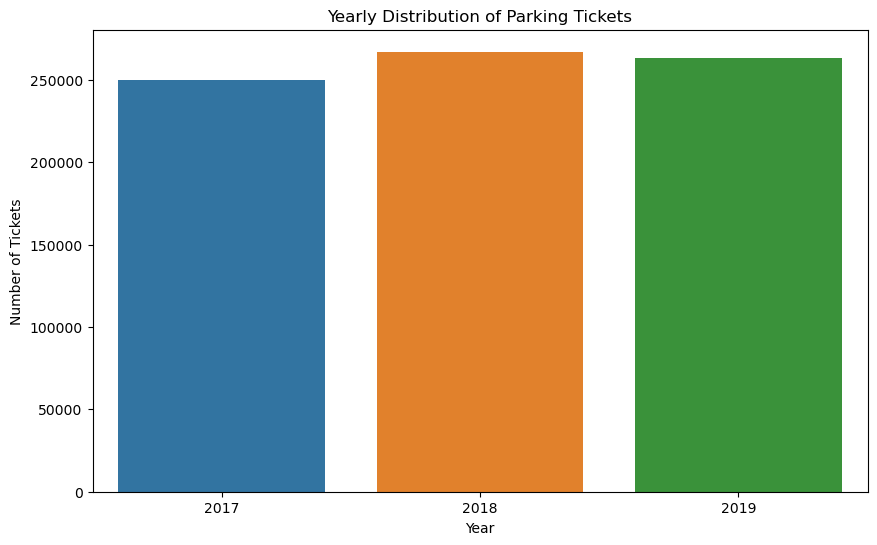

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df1)
plt.title('Yearly Distribution of Parking Tickets')
plt.xlabel('Year')
plt.ylabel('Number of Tickets')
plt.show()


   ## Top10 down streets with most parking Tickets 2017-2019

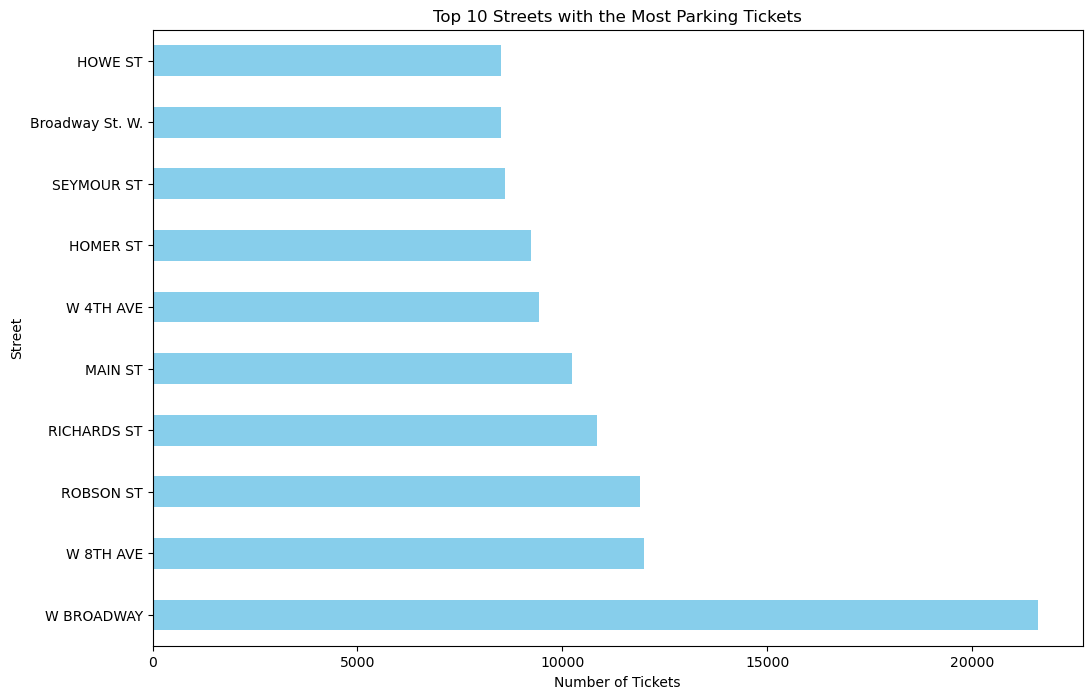

In [49]:
plt.figure(figsize=(12, 8))
top_streets = df1['Street'].value_counts().nlargest(10)
top_streets.plot(kind='barh', color='skyblue')
plt.title('Top 10 Streets with the Most Parking Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Street')
plt.show()


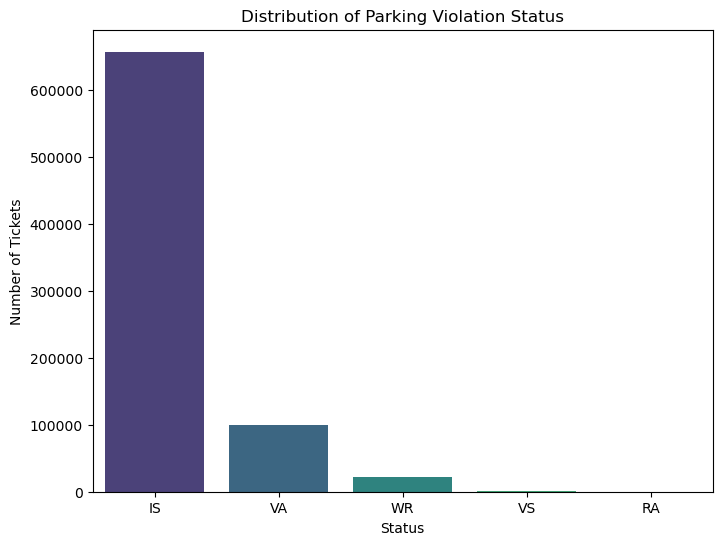

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df1, palette='viridis')
plt.title('Distribution of Parking Violation Status')
plt.xlabel('Status')
plt.ylabel('Number of Tickets')
plt.show()


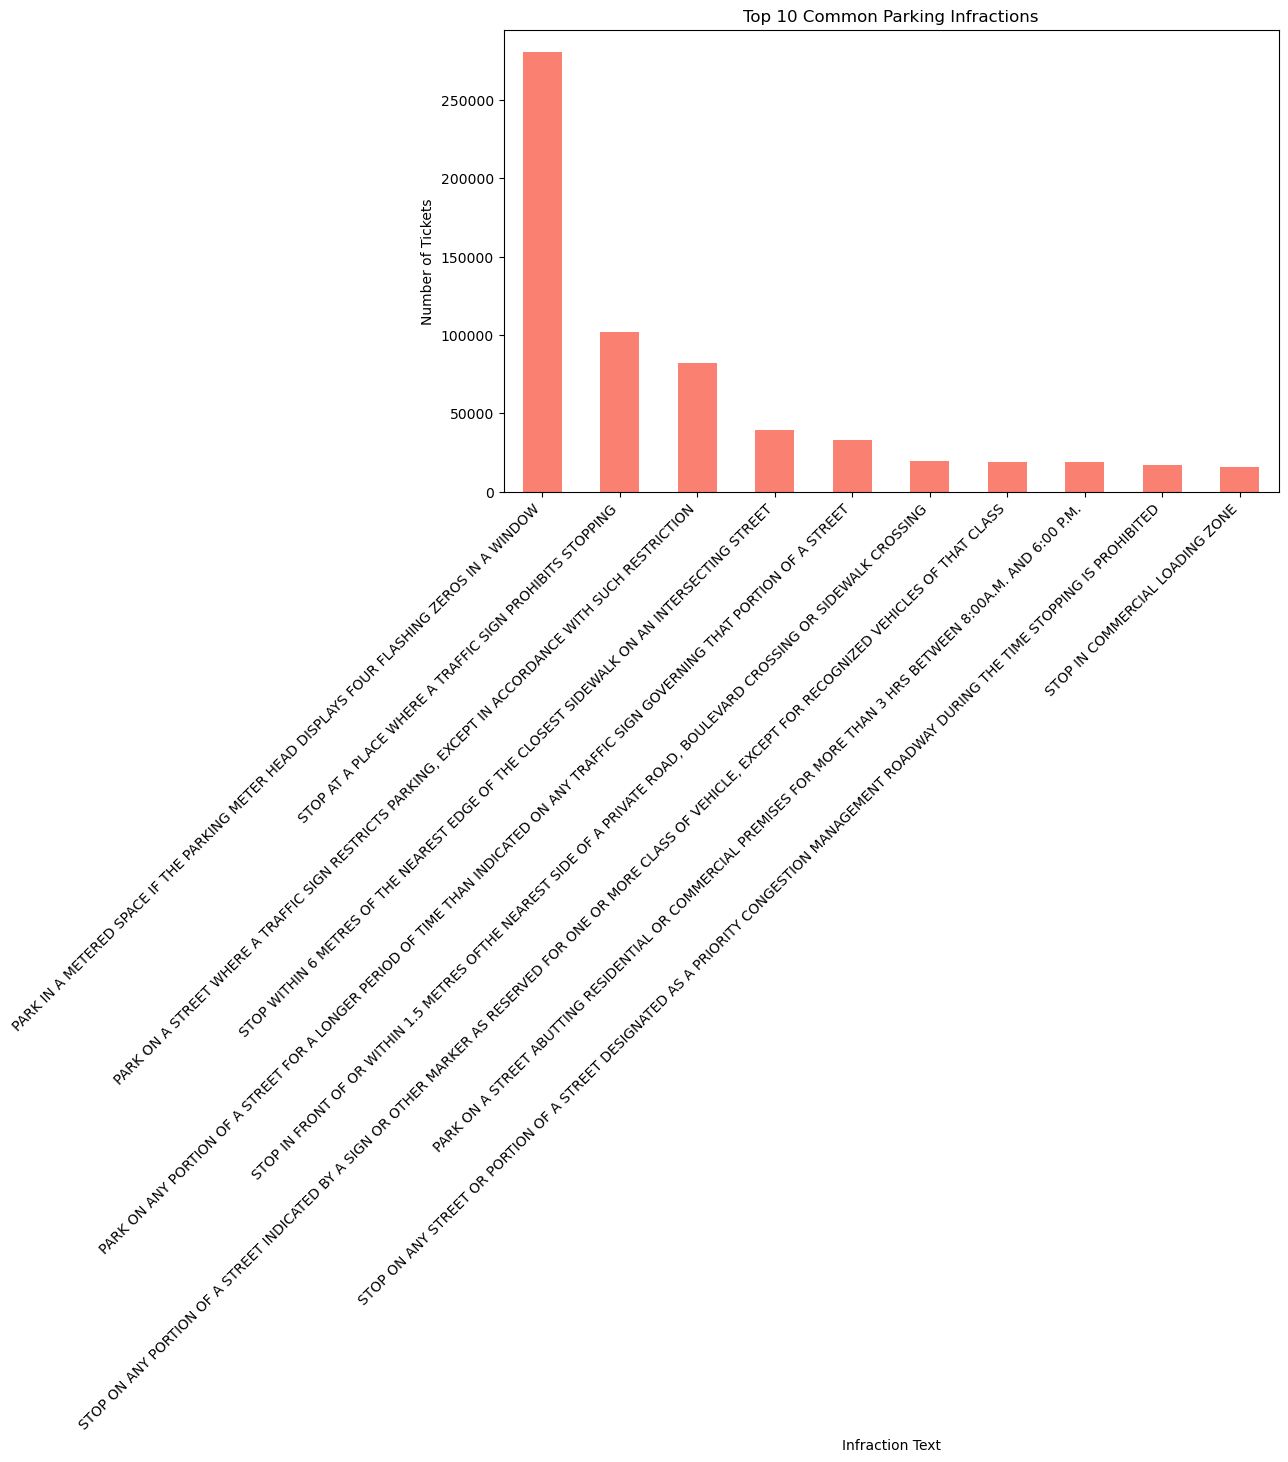

In [51]:
plt.figure(figsize=(10, 6))
common_infractions = df1['InfractionText'].value_counts().nlargest(10)
common_infractions.plot(kind='bar', color='salmon')
plt.title('Top 10 Common Parking Infractions')
plt.xlabel('Infraction Text')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()


### parking ticket data for 2020-2023

In [52]:
df2 = pd.read_csv("parking-tickets.csv", sep=";")

C:\Users\Rajat\AppData\Local\Temp\ipykernel_16632\3845190177.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("parking-tickets.csv", sep=";")


In [53]:
df2

,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year,BI_ID
0,0,KEEFER PLACE,2020-11-01,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2020,3559140
1,600,PACIFIC BLVD,2020-11-01,2952,5(4)(B),IS,PARK IN A METERED SPACE IF THE TIME RECORDED B...,2020,3559143
2,500,TAYLOR ST,2020-11-01,2952,5(4)(A)(ii),VA,PARK IN A METERED SPACE IF THE PARKING METER H...,2020,3559146
3,900,W 13TH AVE,2020-11-01,2849,17.6(B),IS,PARK ON A STREET WHERE A TRAFFIC SIGN RESTRICT...,2020,3559149
4,2500,HEATHER ST,2020-11-01,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2020,3559151
...,...,...,...,...,...,...,...,...,...
1365693,700,E 29TH AVE,2023-04-18,2849,17.1(B),IS,STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS...,2023,4337169
1365694,1400,W 6TH AVE,2023-04-18,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2023,4337176
1365695,1300,W 8TH AVE,2023-04-18,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2023,4337178
1365696,2500,PINE ST,2023-04-18,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2023,4337181


In [54]:
df2.describe()

,Block,Bylaw,Year,BI_ID
count,1.365698e+06,1.365698e+06,1.365698e+06,1.365698e+06
mean,1.473333e+03,2.952883e+03,2.021363e+03,4.373344e+06
std,1.987169e+03,6.567954e+02,1.020396e+00,4.696639e+05
min,0.000000e+00,2.849000e+03,2.020000e+03,5.815800e+04
25%,6.000000e+02,2.849000e+03,2.021000e+03,4.052597e+06
50%,1.100000e+03,2.952000e+03,2.021000e+03,4.402910e+06
75%,1.900000e+03,2.952000e+03,2.022000e+03,4.749778e+06
max,9.990000e+04,1.332300e+04,2.023000e+03,5.091202e+06


In [55]:
df2.duplicated().sum()

0

In [56]:
df2.isnull().sum()

Block                  0
Street                 0
EntryDate              0
Bylaw                  0
Section                0
Status                 0
InfractionText    640914
Year                   0
BI_ID                  0
dtype: int64

##  Top10 down streets with most parking Tickets 2020-2023

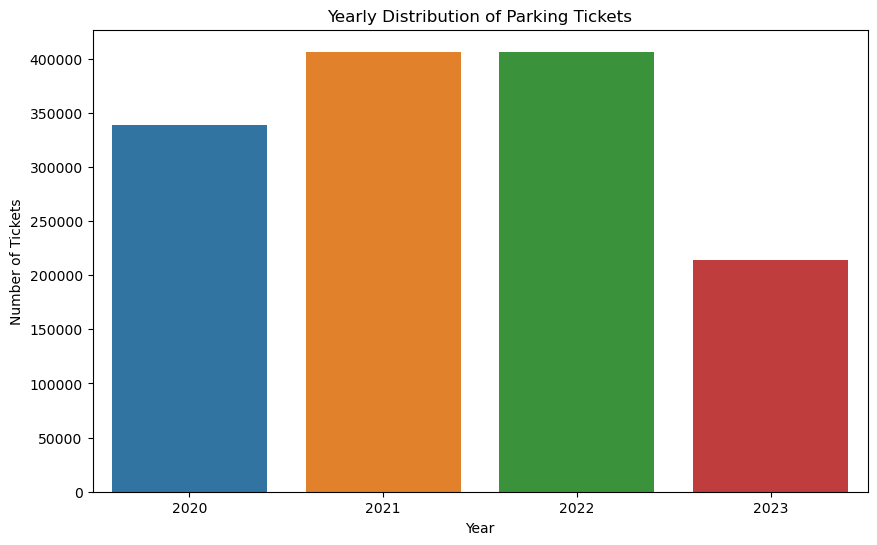

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df2)
plt.title('Yearly Distribution of Parking Tickets')
plt.xlabel('Year')
plt.ylabel('Number of Tickets')
plt.show()


## Top10 down streets with most parking Tickets 2020-2023

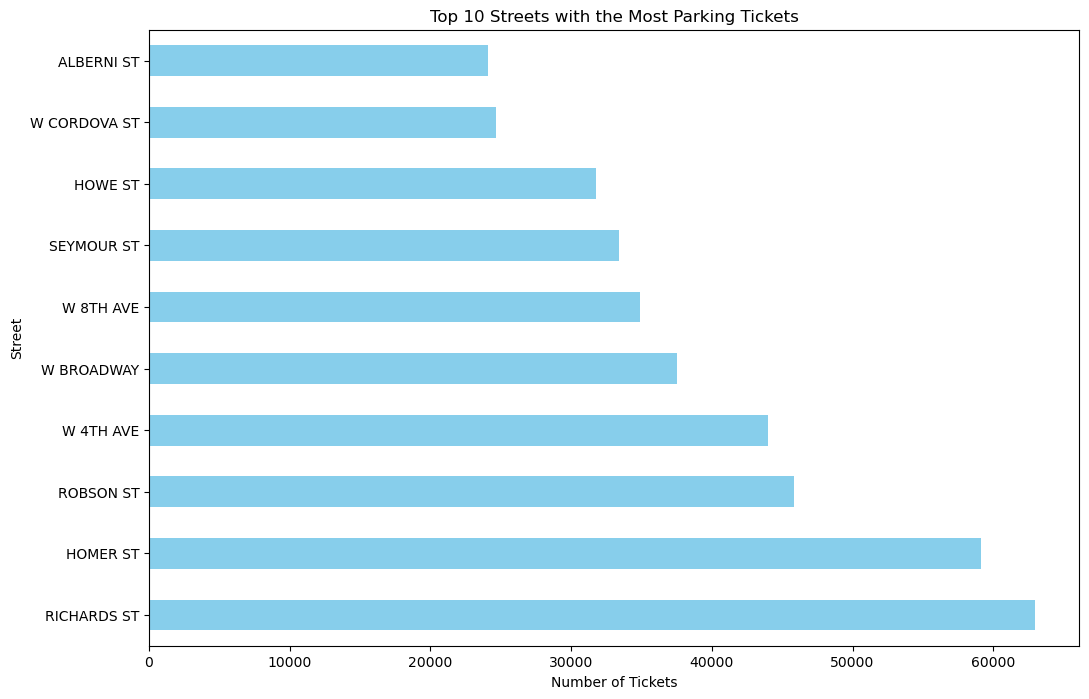

In [58]:
plt.figure(figsize=(12, 8))
top_streets = df2['Street'].value_counts().nlargest(10)
top_streets.plot(kind='barh', color='skyblue')
plt.title('Top 10 Streets with the Most Parking Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Street')
plt.show()


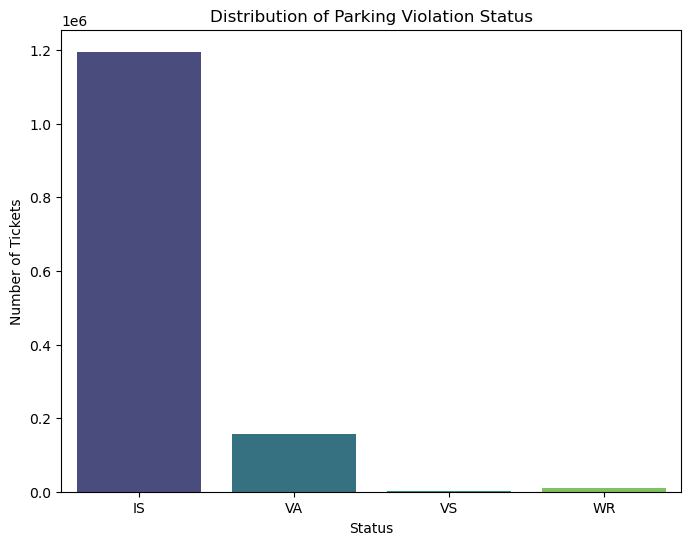

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df2, palette='viridis')
plt.title('Distribution of Parking Violation Status')
plt.xlabel('Status')
plt.ylabel('Number of Tickets')
plt.show()


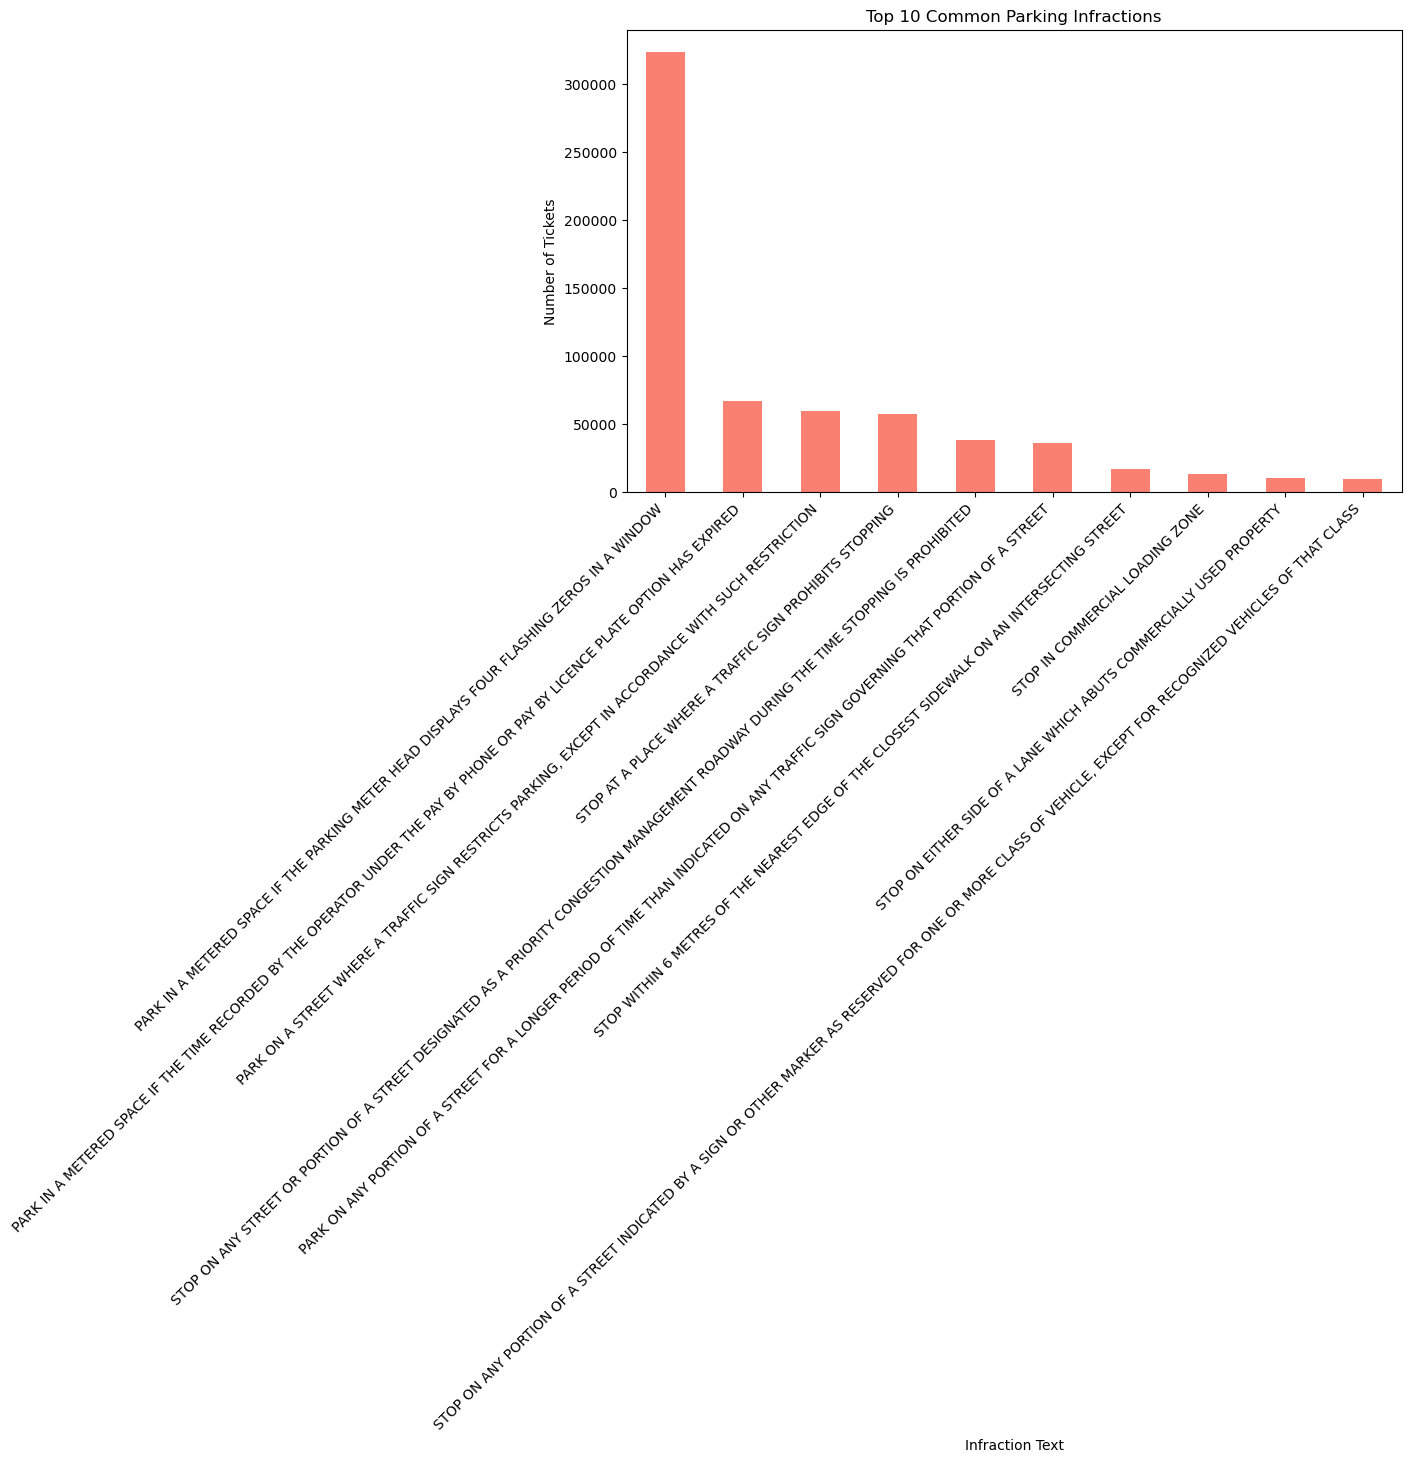

In [60]:
plt.figure(figsize=(10, 6))
common_infractions = df2['InfractionText'].value_counts().nlargest(10)
common_infractions.plot(kind='bar', color='salmon')
plt.title('Top 10 Common Parking Infractions')
plt.xlabel('Infraction Text')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45, ha='right')
plt.show()


## Comparison Between Two

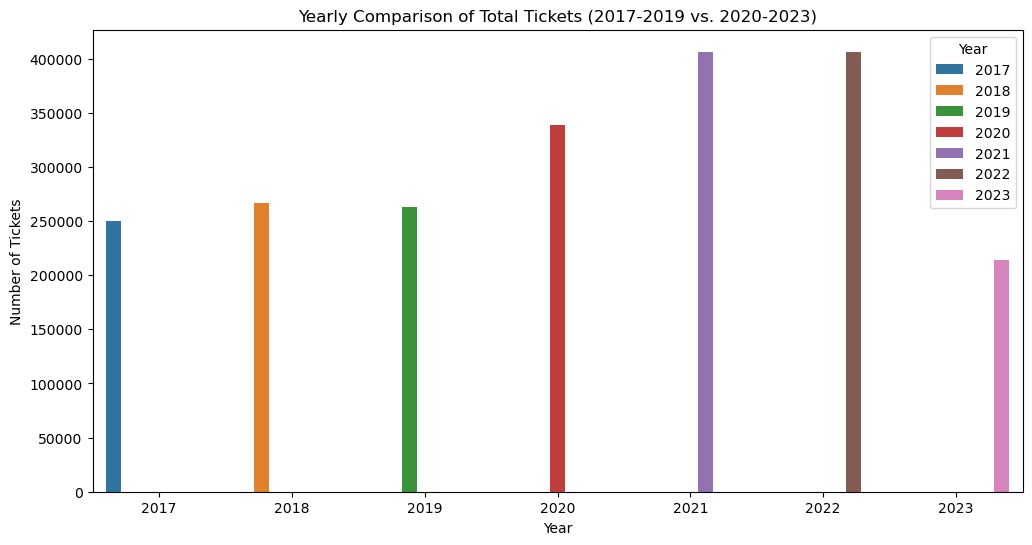

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1719 and df2023 are your DataFrames for the respective time periods

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=pd.concat([df1, df2]), hue='Year')
plt.title('Yearly Comparison of Total Tickets (2017-2019 vs. 2020-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Tickets')
plt.show()


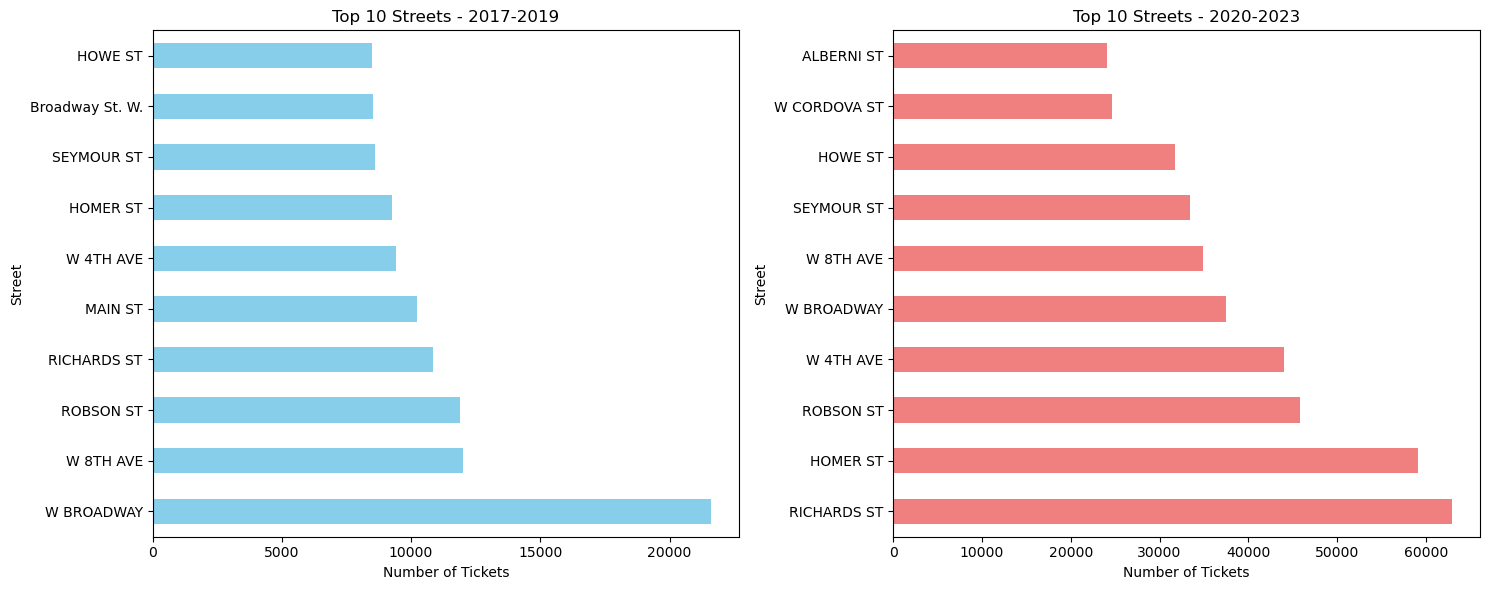

In [62]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
top_streets_1719 = df1['Street'].value_counts().nlargest(10)
top_streets_1719.plot(kind='barh', color='skyblue')
plt.title('Top 10 Streets - 2017-2019')
plt.xlabel('Number of Tickets')
plt.ylabel('Street')

plt.subplot(1, 2, 2)
top_streets_2023 = df2['Street'].value_counts().nlargest(10)
top_streets_2023.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Streets - 2020-2023')
plt.xlabel('Number of Tickets')
plt.ylabel('Street')

plt.tight_layout()
plt.show()


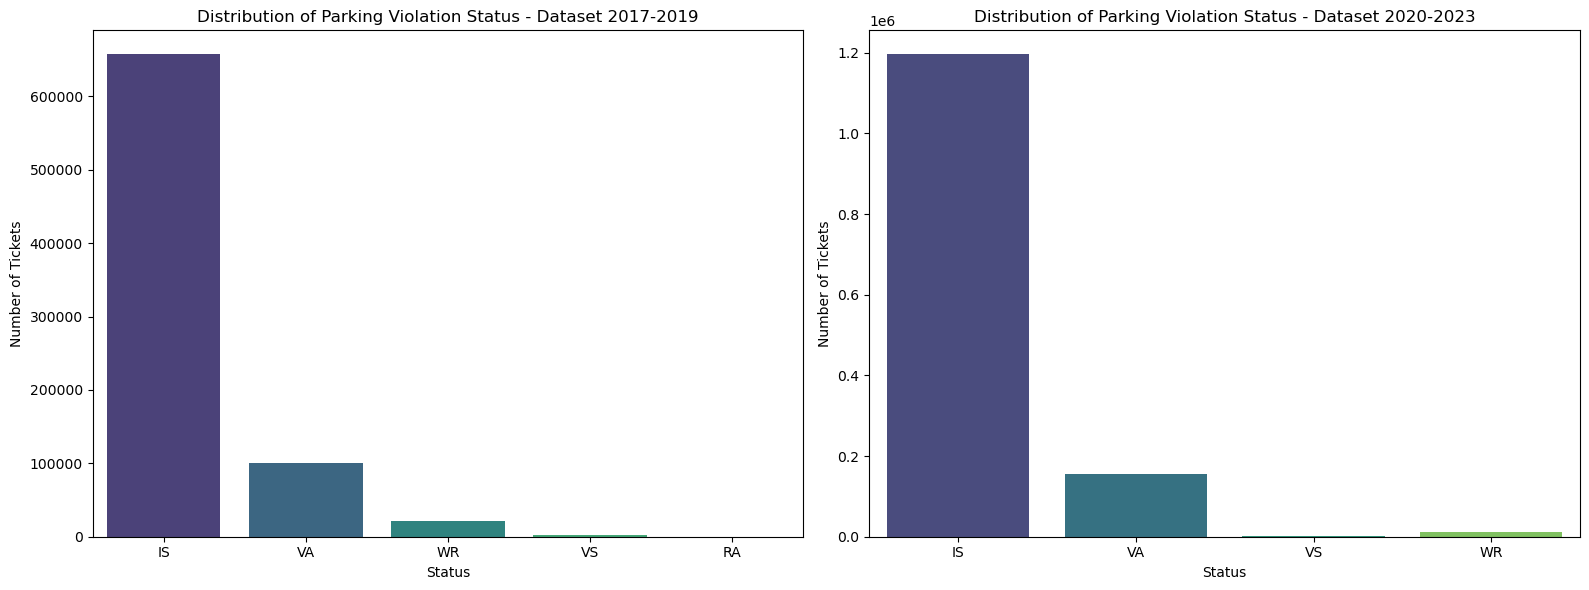

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for df1
sns.countplot(x='Status', data=df1, palette='viridis', ax=axs[0])
axs[0].set_title('Distribution of Parking Violation Status - Dataset 2017-2019')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Number of Tickets')

# Plot for df2
sns.countplot(x='Status', data=df2, palette='viridis', ax=axs[1])
axs[1].set_title('Distribution of Parking Violation Status - Dataset 2020-2023')
axs[1].set_xlabel('Status')
axs[1].set_ylabel('Number of Tickets')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [64]:
df1.Status.unique()

array(['IS', 'VA', 'WR', 'VS', 'RA'], dtype=object)

In [65]:
### Machine learning


In [66]:
df1.describe()

,Block,Bylaw,Year
count,780425.000000,780425.000000,780425.000000
mean,1630.579748,2912.696459,2018.017210
std,1549.594100,432.886216,0.810822
min,0.000000,2849.000000,2017.000000
25%,600.000000,2849.000000,2017.000000
50%,1200.000000,2849.000000,2018.000000
75%,2200.000000,2952.000000,2019.000000
max,90000.000000,12086.000000,2019.000000


In [67]:
df2.describe()

,Block,Bylaw,Year,BI_ID
count,1.365698e+06,1.365698e+06,1.365698e+06,1.365698e+06
mean,1.473333e+03,2.952883e+03,2.021363e+03,4.373344e+06
std,1.987169e+03,6.567954e+02,1.020396e+00,4.696639e+05
min,0.000000e+00,2.849000e+03,2.020000e+03,5.815800e+04
25%,6.000000e+02,2.849000e+03,2.021000e+03,4.052597e+06
50%,1.100000e+03,2.952000e+03,2.021000e+03,4.402910e+06
75%,1.900000e+03,2.952000e+03,2.022000e+03,4.749778e+06
max,9.990000e+04,1.332300e+04,2.023000e+03,5.091202e+06


In [68]:
### We have seen many people got tickets issued IS

In [69]:
df1

,Block,Street,EntryDate,Bylaw,Section,Status,InfractionText,Year
0,800,Great Northern Way,2017-05-08,2849,17.6(A),IS,PARK AT A PLACE ON A STREET WHERE A TRAFFIC SI...,2017
1,3600,Main St.,2017-05-08,2849,17.3,VA,STOP ON ANY PORTION OF A STREET DESIGNATED AS ...,2017
2,3600,Vanness Ave.,2017-05-08,2849,18.1(B),IS,STOP OR PARK OTHER THAN HEADED IN THE DIRECTIO...,2017
3,100,1st Ave W.,2017-05-08,2849,17.2(J),IS,STOP ON ANY PORTION OF A STREET INDICATED BY A...,2017
4,700,10th Ave W.,2017-04-21,2952,5(4)(a)(ii),WR,PARK IN A METERED SPACE IF THE PARKING METER H...,2017
...,...,...,...,...,...,...,...,...
1318725,700,PAT QUINN WAY,2018-09-28,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2018
1318727,2900,GRANVILLE ST,2018-09-29,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2018
1318728,1400,W 11TH AVE,2018-09-29,2952,5(4)(a)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2018
1318730,1400,W 10TH AVE,2018-09-29,2849,17.6(B),IS,PARK ON A STREET WHERE A TRAFFIC SIGN RESTRICT...,2018


In [70]:
df1.Street.unique()

array(['Great Northern Way', 'Main St.', 'Vanness Ave.', ...,
       'WALLACE CRESCENT', 'NARVAEZ DRIVE', 'COLLINGWOOD PL'],
      dtype=object)

In [71]:
np.size(df1["InfractionText"].unique())

123

## Concating both datasets from 2017 to 2023

In [72]:
df1 = df1.drop(columns=["InfractionText"])
df2 = df2.drop(columns=["InfractionText"])

In [73]:
df1 = df1.drop_duplicates()

In [74]:
df1.isnull().sum()


Block        0
Street       0
EntryDate    0
Bylaw        0
Section      0
Status       0
Year         0
dtype: int64

In [75]:
df2.isnull().sum()

Block        0
Street       0
EntryDate    0
Bylaw        0
Section      0
Status       0
Year         0
BI_ID        0
dtype: int64

In [76]:
df3 = pd.concat([df1, df2], ignore_index=True)

In [77]:
df3.isnull().sum()

Block             0
Street            0
EntryDate         0
Bylaw             0
Section           0
Status            0
Year              0
BI_ID        780018
dtype: int64

In [78]:
df3 = df3.drop(columns=["BI_ID", "Street"])

In [79]:
df3 = df3.drop_duplicates()

In [80]:
df3.duplicated().sum()

0

In [81]:
df3.isnull().sum()

Block        0
EntryDate    0
Bylaw        0
Section      0
Status       0
Year         0
dtype: int64

In [82]:
df3.head()

,Block,EntryDate,Bylaw,Section,Status,Year
0,800,2017-05-08,2849,17.6(A),IS,2017
1,3600,2017-05-08,2849,17.3,VA,2017
2,3600,2017-05-08,2849,18.1(B),IS,2017
3,100,2017-05-08,2849,17.2(J),IS,2017
4,700,2017-04-21,2952,5(4)(a)(ii),WR,2017


In [83]:
np.size(df3.Section.unique())

133

###  Making new column for Entry Month

In [84]:
df3['EntryMonth'] = pd.to_datetime(df3['EntryDate']).dt.month


In [85]:
df3 = df3.drop(columns=["EntryDate"])

In [86]:
df3.head()

,Block,Bylaw,Section,Status,Year,EntryMonth
0,800,2849,17.6(A),IS,2017,5
1,3600,2849,17.3,VA,2017,5
2,3600,2849,18.1(B),IS,2017,5
3,100,2849,17.2(J),IS,2017,5
4,700,2952,5(4)(a)(ii),WR,2017,4


## Label Encoding

In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df3['Section_LabelEncoded'] = le.fit_transform(df3['Section'])


In [88]:
df3 = df3.drop(columns=["Section"])

In [89]:
df1.Status.unique()

array(['IS', 'VA', 'WR', 'VS', 'RA'], dtype=object)

### IF ISSUED then 1 else 0

In [90]:
df3["Issued"] = df3.Status.apply(lambda x: 1 if x == "IS" else 0 )

In [91]:
df3 = df3.drop(columns=["Status"])

In [92]:
df3.head()

,Block,Bylaw,Year,EntryMonth,Section_LabelEncoded,Issued
0,800,2849,2017,5,46,1
1,3600,2849,2017,5,26,0
2,3600,2849,2017,5,56,1
3,100,2849,2017,5,22,1
4,700,2952,2017,4,96,0


In [93]:

dfN = df3.sample(frac=0.025 ,random_state=42)
dfN.shape

(20894, 6)

In [94]:
dfN.shape

(20894, 6)

In [95]:
features = dfN.drop(columns=["Issued"])
target = dfN.Issued

### performing train and test splitting

In [96]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [97]:
classifiers = [
    
    LogisticRegression(),
    KNeighborsClassifier(2),
    LinearSVC(),
    DecisionTreeClassifier(max_depth=6),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(), 
    CatBoostClassifier(),
    MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.1,
                    max_iter=2000, random_state=42)
    
      
]

In [98]:
names = ["logistic Regression", "KNN", "Linear SVC", "SVC with Best parameters","Decision Tree", "Naive Bayes", "Random Forest Class", "Ada", "XG", "Cat", "ANN 1 hidden" ]

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
scores = []

### Creating pipeline and applying variousclassifier  models 

In [100]:
for clf in classifiers:
    pipe = Pipeline([
        ("Standard Scaler", StandardScaler()),
        ("VarianceThreshold", VarianceThreshold(threshold=0.01)),
        
        ("classifiers", clf)

    ])   
    

    pipe.fit(X_train, y_train)
    
    print(clf)
    scores.append(pipe.score(X_test, y_test))


LogisticRegression()
KNeighborsClassifier(n_neighbors=2)


C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()
DecisionTreeClassifier(max_depth=6)
GaussianNB()
RandomForestClassifier()
AdaBoostClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Learning rate set to 0.03336
0:	learn: 0.6840227	total: 153ms	remaining: 2m 32s
1:	learn: 0.6754230	total: 162ms	remaining: 1m 20s
2:	learn: 

156:	learn: 0.5128287	total: 1.37s	remaining: 7.38s
157:	learn: 0.5125412	total: 1.38s	remaining: 7.36s
158:	learn: 0.5124454	total: 1.39s	remaining: 7.35s
159:	learn: 0.5123669	total: 1.4s	remaining: 7.33s
160:	learn: 0.5122274	total: 1.4s	remaining: 7.32s
161:	learn: 0.5118982	total: 1.41s	remaining: 7.3s
162:	learn: 0.5117266	total: 1.42s	remaining: 7.28s
163:	learn: 0.5116820	total: 1.42s	remaining: 7.26s
164:	learn: 0.5116249	total: 1.43s	remaining: 7.24s
165:	learn: 0.5115037	total: 1.44s	remaining: 7.23s
166:	learn: 0.5114475	total: 1.45s	remaining: 7.21s
167:	learn: 0.5113983	total: 1.45s	remaining: 7.19s
168:	learn: 0.5112462	total: 1.46s	remaining: 7.18s
169:	learn: 0.5111122	total: 1.47s	remaining: 7.16s
170:	learn: 0.5109855	total: 1.47s	remaining: 7.14s
171:	learn: 0.5109414	total: 1.48s	remaining: 7.13s
172:	learn: 0.5108182	total: 1.49s	remaining: 7.12s
173:	learn: 0.5107433	total: 1.5s	remaining: 7.1s
174:	learn: 0.5105727	total: 1.5s	remaining: 7.09s
175:	learn: 0.5104

328:	learn: 0.4956368	total: 2.79s	remaining: 5.68s
329:	learn: 0.4955753	total: 2.8s	remaining: 5.68s
330:	learn: 0.4954319	total: 2.81s	remaining: 5.67s
331:	learn: 0.4953318	total: 2.81s	remaining: 5.66s
332:	learn: 0.4952004	total: 2.82s	remaining: 5.65s
333:	learn: 0.4951092	total: 2.83s	remaining: 5.64s
334:	learn: 0.4950388	total: 2.84s	remaining: 5.63s
335:	learn: 0.4949931	total: 2.85s	remaining: 5.63s
336:	learn: 0.4949370	total: 2.85s	remaining: 5.62s
337:	learn: 0.4948618	total: 2.86s	remaining: 5.61s
338:	learn: 0.4947614	total: 2.87s	remaining: 5.59s
339:	learn: 0.4946434	total: 2.88s	remaining: 5.59s
340:	learn: 0.4945609	total: 2.89s	remaining: 5.58s
341:	learn: 0.4944540	total: 2.89s	remaining: 5.57s
342:	learn: 0.4943519	total: 2.9s	remaining: 5.56s
343:	learn: 0.4942786	total: 2.91s	remaining: 5.55s
344:	learn: 0.4941853	total: 2.92s	remaining: 5.54s
345:	learn: 0.4941479	total: 2.92s	remaining: 5.53s
346:	learn: 0.4940535	total: 2.93s	remaining: 5.52s
347:	learn: 0.

496:	learn: 0.4824702	total: 4.21s	remaining: 4.26s
497:	learn: 0.4824080	total: 4.22s	remaining: 4.25s
498:	learn: 0.4823267	total: 4.23s	remaining: 4.24s
499:	learn: 0.4822413	total: 4.24s	remaining: 4.24s
500:	learn: 0.4822053	total: 4.24s	remaining: 4.23s
501:	learn: 0.4821312	total: 4.25s	remaining: 4.22s
502:	learn: 0.4820515	total: 4.26s	remaining: 4.21s
503:	learn: 0.4819662	total: 4.27s	remaining: 4.2s
504:	learn: 0.4818942	total: 4.28s	remaining: 4.19s
505:	learn: 0.4818415	total: 4.29s	remaining: 4.18s
506:	learn: 0.4817876	total: 4.3s	remaining: 4.18s
507:	learn: 0.4817266	total: 4.31s	remaining: 4.17s
508:	learn: 0.4816778	total: 4.31s	remaining: 4.16s
509:	learn: 0.4816284	total: 4.32s	remaining: 4.15s
510:	learn: 0.4815672	total: 4.33s	remaining: 4.15s
511:	learn: 0.4814909	total: 4.34s	remaining: 4.14s
512:	learn: 0.4814165	total: 4.35s	remaining: 4.13s
513:	learn: 0.4813732	total: 4.36s	remaining: 4.12s
514:	learn: 0.4813024	total: 4.37s	remaining: 4.12s
515:	learn: 0.

660:	learn: 0.4725439	total: 5.66s	remaining: 2.9s
661:	learn: 0.4724978	total: 5.67s	remaining: 2.89s
662:	learn: 0.4724266	total: 5.68s	remaining: 2.88s
663:	learn: 0.4723650	total: 5.69s	remaining: 2.88s
664:	learn: 0.4722765	total: 5.7s	remaining: 2.87s
665:	learn: 0.4722372	total: 5.7s	remaining: 2.86s
666:	learn: 0.4721905	total: 5.71s	remaining: 2.85s
667:	learn: 0.4721347	total: 5.72s	remaining: 2.84s
668:	learn: 0.4720733	total: 5.73s	remaining: 2.83s
669:	learn: 0.4720219	total: 5.74s	remaining: 2.83s
670:	learn: 0.4719693	total: 5.75s	remaining: 2.82s
671:	learn: 0.4719265	total: 5.75s	remaining: 2.81s
672:	learn: 0.4718959	total: 5.76s	remaining: 2.8s
673:	learn: 0.4718519	total: 5.77s	remaining: 2.79s
674:	learn: 0.4717810	total: 5.78s	remaining: 2.78s
675:	learn: 0.4717124	total: 5.79s	remaining: 2.77s
676:	learn: 0.4716539	total: 5.8s	remaining: 2.77s
677:	learn: 0.4715789	total: 5.81s	remaining: 2.76s
678:	learn: 0.4715128	total: 5.82s	remaining: 2.75s
679:	learn: 0.471

827:	learn: 0.4640836	total: 7.08s	remaining: 1.47s
828:	learn: 0.4640337	total: 7.09s	remaining: 1.46s
829:	learn: 0.4639845	total: 7.1s	remaining: 1.45s
830:	learn: 0.4639357	total: 7.11s	remaining: 1.45s
831:	learn: 0.4638819	total: 7.12s	remaining: 1.44s
832:	learn: 0.4638157	total: 7.14s	remaining: 1.43s
833:	learn: 0.4637494	total: 7.15s	remaining: 1.42s
834:	learn: 0.4637095	total: 7.16s	remaining: 1.42s
835:	learn: 0.4636544	total: 7.17s	remaining: 1.41s
836:	learn: 0.4636110	total: 7.18s	remaining: 1.4s
837:	learn: 0.4635173	total: 7.19s	remaining: 1.39s
838:	learn: 0.4634862	total: 7.2s	remaining: 1.38s
839:	learn: 0.4634362	total: 7.21s	remaining: 1.37s
840:	learn: 0.4633969	total: 7.22s	remaining: 1.36s
841:	learn: 0.4633484	total: 7.23s	remaining: 1.36s
842:	learn: 0.4633048	total: 7.24s	remaining: 1.35s
843:	learn: 0.4632508	total: 7.25s	remaining: 1.34s
844:	learn: 0.4631979	total: 7.25s	remaining: 1.33s
845:	learn: 0.4631687	total: 7.26s	remaining: 1.32s
846:	learn: 0.4

MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.1, max_iter=2000,
              random_state=42)


In [101]:
dfResult = pd.DataFrame(zip(names, scores), columns=["Model Names", "Scores"])
dfResult

,Model Names,Scores
0,logistic Regression,0.743874
1,KNN,0.583844
2,Linear SVC,0.743874
3,SVC with Best parameters,0.769717
4,Decision Tree,0.724923
5,Naive Bayes,0.730283
6,Random Forest Class,0.765505
7,Ada,0.768760
8,XG,0.775268
9,Cat,0.745980


### Sorting Values according to highest scores 

In [102]:
dfResult.sort_values(by=["Scores"], ascending=False)

,Model Names,Scores
8,XG,0.775268
3,SVC with Best parameters,0.769717
7,Ada,0.768760
6,Random Forest Class,0.765505
9,Cat,0.745980
0,logistic Regression,0.743874
2,Linear SVC,0.743874
5,Naive Bayes,0.730283
4,Decision Tree,0.724923
1,KNN,0.583844


### XGBoost Peforms Best 

In [103]:

pipe1 = Pipeline([
    ("Standard Scaler", StandardScaler()),
    ("VarianceThreshold", VarianceThreshold(threshold=0.01)),
    ("classifiers", XGBClassifier())

])   


pipe1.fit(X_train, y_train)
ypred = pipe1.predict(X_test)
y_probs = pipe.predict_proba(X_test)[:, 1] 

print(pipe1.score(X_test, y_test))


0.7687595712098009


### Confusion Matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

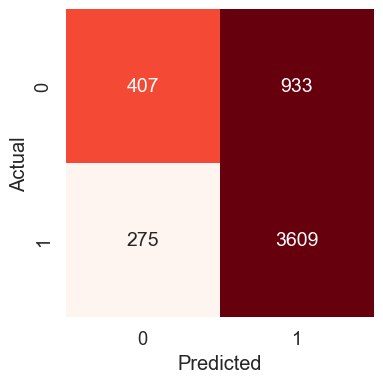

In [104]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 14}, cbar=False,
          vmax=500, square=True, fmt="d", cmap="Reds")# font size

### ROC Curve

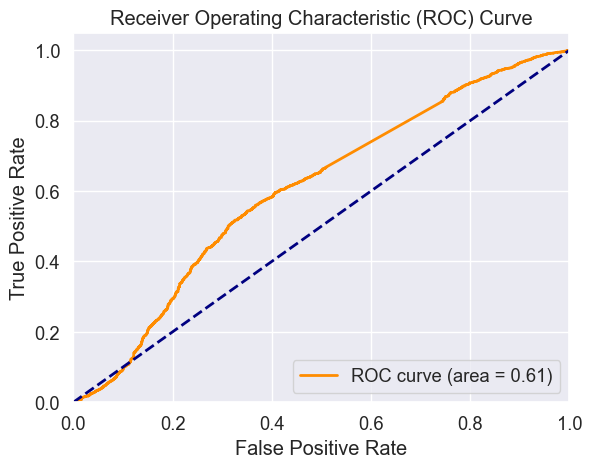

In [105]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Implementing sequential neural Network but getting same accuracy as upper used model 

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Create the Keras model
model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer=he_normal(), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_initializer=he_normal()))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_initializer=he_normal()))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer=he_normal()))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
batch_size = 16
epochs = 20
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


C:\Users\Rajat\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Epoch 1/20
627/627 [==============================] - 5s 5ms/step - loss: 0.6783 - accuracy: 0.7029 - val_loss: 0.5897 - val_accuracy: 0.7356
Epoch 2/20
627/627 [==============================] - 3s 5ms/step - loss: 0.5914 - accuracy: 0.7374 - val_loss: 0.5736 - val_accuracy: 0.7356
Epoch 3/20
627/627 [==============================] - 3s 6ms/step - loss: 0.5802 - accuracy: 0.7373 - val_loss: 0.5707 - val_accuracy: 0.7356
Epoch 4/20
627/627 [==============================] - 3s 6ms/step - loss: 0.5754 - accuracy: 0.7364 - val_loss: 0.5724 - val_accuracy: 0.7356
Epoch 5/20
627/627 [==============================] - 3s 5ms/step - loss: 0.5710 - accuracy: 0.7378 - val_loss: 0.5732 - val_accuracy: 0.7356
Epoch 6/20
164/164 [==============================] - 0s 2ms/step - loss: 72.9740 - accuracy: 0.7435
Test loss: 72.97402954101562, Test accuracy: 0.7434915900230408


### Epoch loss graph

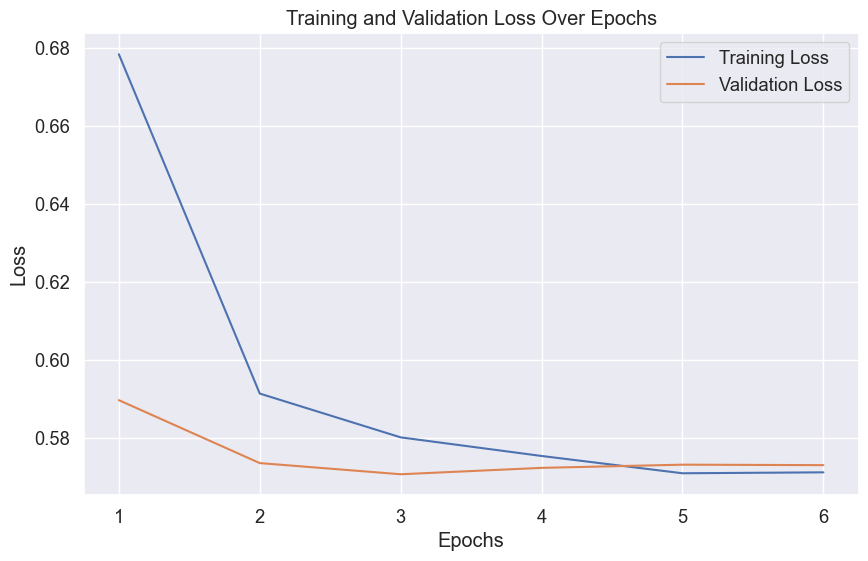

In [108]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epochs
epochs_range = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

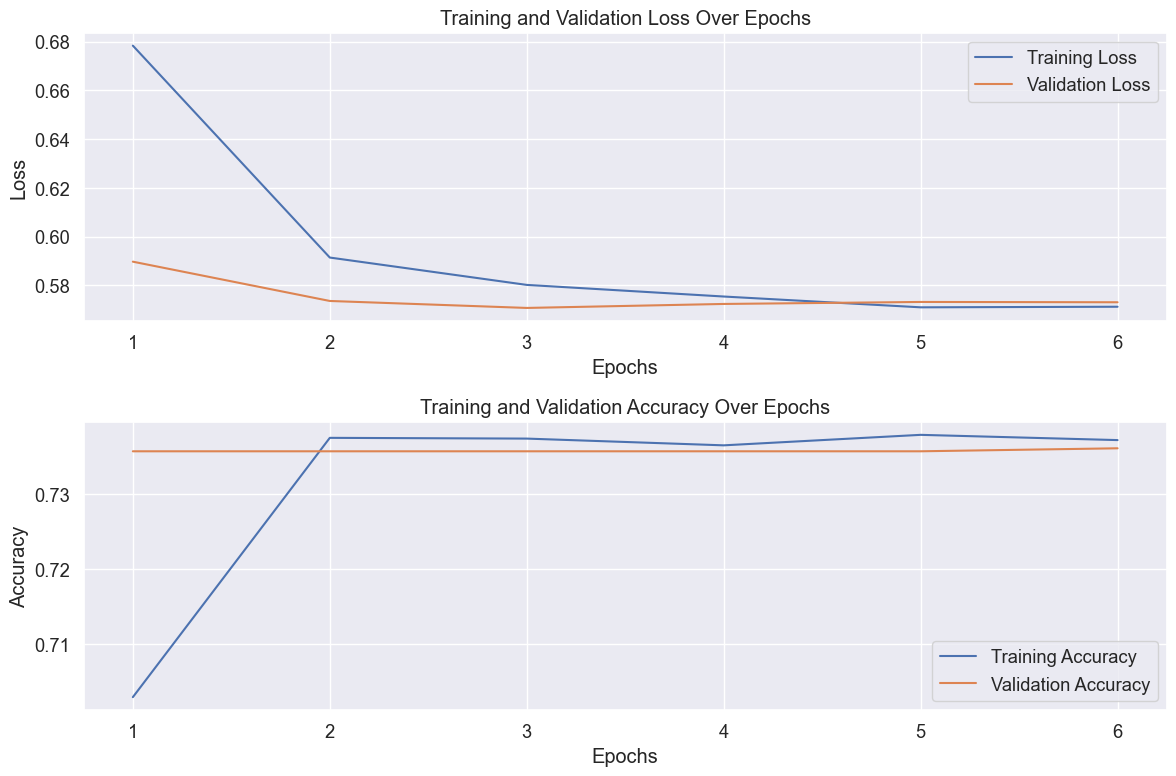

In [109]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs
epochs_range = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Loss
plt.subplot(2, 1, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(2, 1, 2)
plt.plot(epochs_range, train_accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()